In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [0]:
# Filled the missing values by KNN imputation with different k values
KNN_Imputed = "drive/My Drive/Thesis/data/Feature_Engineering/KNN_Imputed_Datasets/KNN_Imputed_k_{}.csv"

data = pd.read_csv("/content/drive/My Drive/Thesis/data/Feature_Engineering/v1_feature_engineering_data.csv", sep=',', low_memory=False)


In [0]:
Info = ['T_CHASSIS', 'Malfunction_Label', 'DELIVERY_DATE', 'LAST_RUN', 'LAST_RUN.1', 'BIWEEK_SEND_DATE', 'RUL']
cat_features_names = np.array(list(set(data.select_dtypes(include=['object']).columns) - set(Info)))
numerical_features_names = np.array(list(set(data.columns) - set(cat_features_names) - set(Info))) 


In [7]:
print(cat_features_names.shape)
print(numerical_features_names.shape) # Numerical is 362, and not 369 since 7 of them are info variables

(69,)
(362,)


In [0]:
numerical_features = data[numerical_features_names]

print(numerical_features)

In [14]:
# First standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(numerical_features.values)
scaled_df = pd.DataFrame(x_scaled, columns = numerical_features.columns)

# Impute Values
from sklearn.impute import KNNImputer
k_values = [2,3,5,10,20,30,40,50]

s = time.time()

# Takes 36 mins
for k in k_values:
  data_to_be_filled = data.copy()
  print('Now starting Imputation for K:{}'.format(k))
  imputer = KNNImputer(n_neighbors=k, weights = 'distance', metric = 'nan_euclidean')
  filled = imputer.fit_transform(scaled_df)
  filled_df = pd.DataFrame(filled, columns = numerical_features.columns)

  # Save the filled values back to the original dataframe
  data_to_be_filled[numerical_features_names] = filled_df

  # Saving to .csv after filling the missing cells
  data_to_be_filled.to_csv(KNN_Imputed.format(k), index=False, sep=',')
  
  # Check if there are any nan values
  print('Checking if there are any nan values')
  print(data_to_be_filled[data.isnull().any(axis=1)])

e = time.time()

print((e-s)/60)

Now starting Imputation for K:2
Checking if there are any nan values
Empty DataFrame
Columns: [BIWEEK_SEND_DATE, DAY, MONTH, YEAR, Malfunction_Label, RUL, DELIVERY_DATE, LAST_RUN, LAST_RUN.1, T_CHASSIS, INT_BWSD, LX_PMU_P1FH1_SLOPE_X_INDEX_10, LX_PMU_P1FH1_SLOPE_X_INDEX_11, LX_PMU_P1FH1_SLOPE_X_INDEX_12, LX_PMU_P1FH1_SLOPE_X_INDEX_13, LX_PMU_P1FH1_SLOPE_X_INDEX_14, LX_PMU_P1FH1_SLOPE_X_INDEX_15, LX_PMU_P1FH1_SLOPE_X_INDEX_16, LX_PMU_P1FH1_SLOPE_X_INDEX_17, LX_PMU_P1FH1_SLOPE_X_INDEX_18, LX_PMU_P1FH1_SLOPE_X_INDEX_19, LX_PMU_P1FH1_SLOPE_X_INDEX_2, LX_PMU_P1FH1_SLOPE_X_INDEX_20, LX_PMU_P1FH1_SLOPE_X_INDEX_21, LX_PMU_P1FH1_SLOPE_X_INDEX_22, LX_PMU_P1FH1_SLOPE_X_INDEX_23, LX_PMU_P1FH1_SLOPE_X_INDEX_24, LX_PMU_P1FH1_SLOPE_X_INDEX_25, LX_PMU_P1FH1_SLOPE_X_INDEX_26, LX_PMU_P1FH1_SLOPE_X_INDEX_27, LX_PMU_P1FH1_SLOPE_X_INDEX_28, LX_PMU_P1FH1_SLOPE_X_INDEX_29, LX_PMU_P1FH1_SLOPE_X_INDEX_3, LX_PMU_P1FH1_SLOPE_X_INDEX_30, LX_PMU_P1FH1_SLOPE_X_INDEX_31, LX_PMU_P1FH1_SLOPE_X_INDEX_4, LX_PMU_P1FH1_SL

In [0]:
# 4 mins to run

from sklearn.feature_selection import mutual_info_regression

X = numerical_features.values
y = data['RUL'].values

mutual_score = mutual_info_regression(X=X, y=y, n_neighbors=3)



Text(0.5, 1.0, 'Mutual Information for all Features')

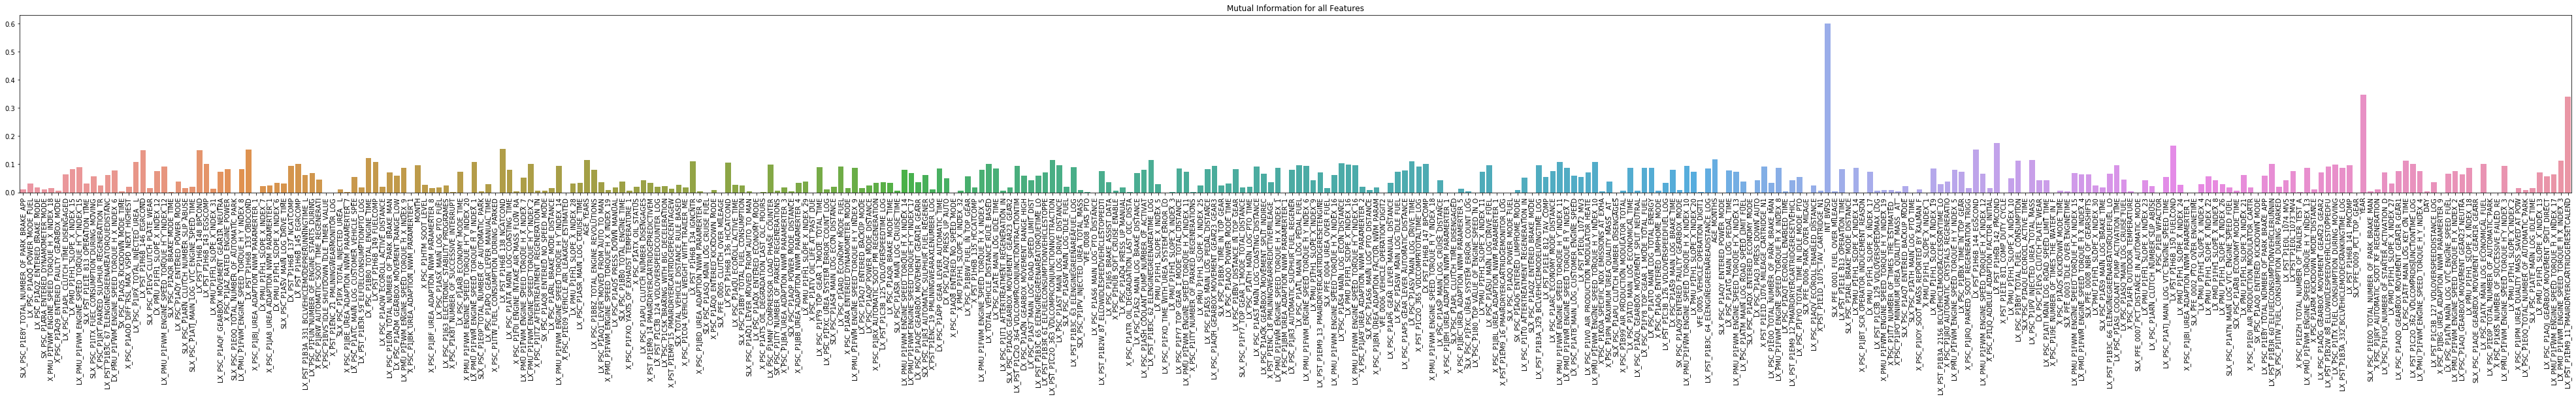

In [0]:
# ploting the result of mutual information
plt.figure(figsize=(70, 5))
g = sns.barplot(x=numerical_features.columns, y=mutual_score)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features")

In [0]:
count = 0
for x in mutual_score:
  if x > 0.15:
    count += 1
print (count)

10


In [0]:
### an helper function for extracting the best features possible
def extract_best_features(feature_scores, feature_col, n=5, sort_metric=False):
    # this function extracts out the best features.
    # inputs 
    temp = np.hstack((feature_scores.reshape(-1,1), feature_col.reshape(-1,1)))
    features = pd.DataFrame(temp, columns=['score', 'name'])
    # sort the features
    features = features.sort_values(by=['score'], ascending=sort_metric).reset_index(drop=True)
    # extract the best features
    best_features = features.iloc[:n, :].to_numpy()
    return best_features

In [0]:
best_features = extract_best_features(mutual_score, numerical_features.columns.values, n=30)
best_features

array([[0.601049444649516, 'INT_BWSD'],
       [0.3471851683746787, 'YEAR'],
       [0.34094469022264207,
        'LX_PST_P1EM9_11_PMAIRDRYERCARTRIDGERESETCALEND'],
       [0.17536431980765155, 'LX_PST_P1H6B_142_PMCOND'],
       [0.16564792170775355, 'LX_PST_P1H6B_150_FUELCOND'],
       [0.1535152665960613, 'LX_PST_P1H6B_138_NCATCOND'],
       [0.1533396536422238, 'LX_PST_P1H6B_133_OBDCOND'],
       [0.15297450015470293, 'LX_PST_P1H6B_144_EGSCOND'],
       [0.1510757077162035, 'LX_PST_P1H6B_148_BPCOND'],
       [0.1509083033374896, 'LX_PST_P1H6B_146_EGRCOND'],
       [0.12150727530323646, 'LX_PSC_P1BB0_TOTAL_ENGINE_TIME'],
       [0.11627473415790046, 'AGE_MONTHS'],
       [0.11590154483284643, 'LX_PST_P1B3C_62_ELENGINEGREENAREATIME_LOG'],
       [0.11565357194521475,
        'LX_PST_P1C2O_363_VDLCOMPRCONJUNCTIONNOTTRACTION'],
       [0.11555464680376826, 'LX_PSC_P1IPV_INJECTED_UREA_TOTAL_MASS'],
       [0.11468347307977034, 'AGE_YEARS'],
       [0.11387357426468636,
        'LX_PMU_P1

Text(0.5, 1.0, 'Mutual Information for all Features')

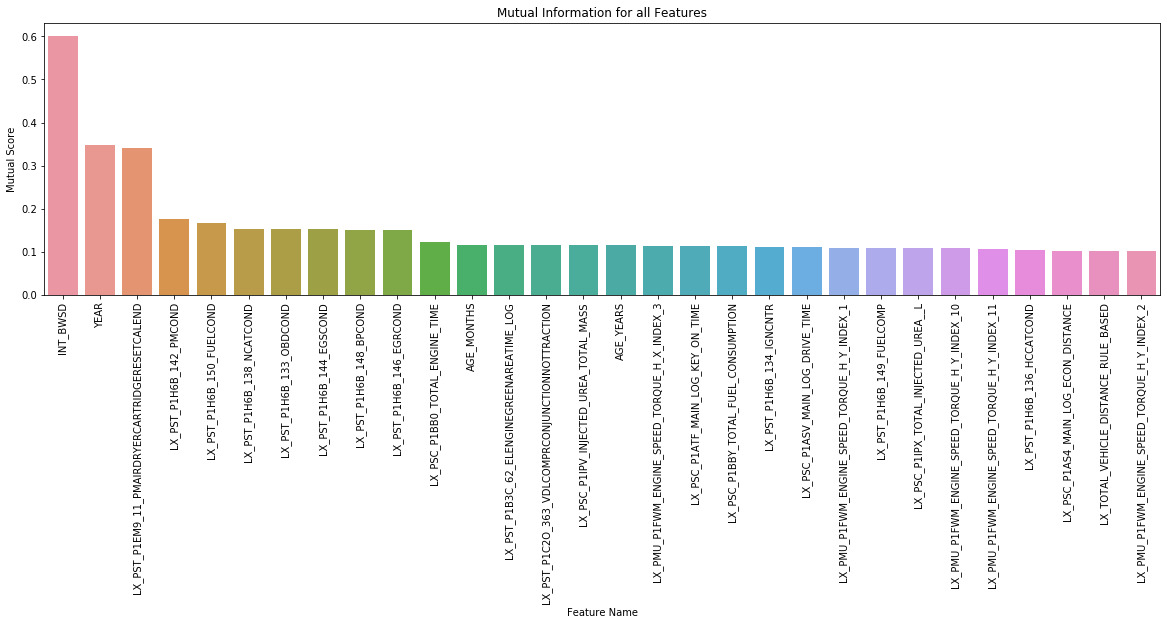

In [0]:
# ploting the result of mutual information
plt.figure(figsize=(20, 5))

df = pd.DataFrame(data = best_features, columns = ['Mutual Score','Feature Name'])
g = sns.barplot(x=df['Feature Name'], y=df['Mutual Score'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features")